In [6]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import time
from tqdm import tqdm

%matplotlib inline

#每次可以输出多个变量
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

import warnings
warnings.filterwarnings("ignore")

#中文字体
import matplotlib  
matplotlib.use('qt4agg')  
#指定默认字体  
matplotlib.rcParams['font.sans-serif'] = ['SimHei']   
matplotlib.rcParams['font.family']='sans-serif'  
#解决负号'-'显示为方块的问题  
matplotlib.rcParams['axes.unicode_minus'] = False 

In [7]:
df = pd.read_csv('df.txt', sep=' ')

df.shape
df.head()

(478138, 27)

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_id,user_gender_id,user_age_level,user_occupation_id,user_star_level,context_id,context_timestamp,context_page_id,predict_category_property,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade
0,108641074714126964,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,4505772604969228686,1,1003,2005,3003,282924576738839389,1537236544,4006,5799347067982556520:-1;509660095530134768:-1;5...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
1,5754713551599725161,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,2692638157208937547,0,1002,2005,3006,4007979028023783431,1537243232,4001,5799347067982556520:9172976955054793469;790838...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
2,842679481291040981,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,5247924392014515924,0,1003,2005,3004,4884875192608989870,1537211052,4001,5799347067982556520:5131280576272319091;725801...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
3,937088850059189027,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,2681414445369714628,1,1004,2005,3006,840119421106178602,1537222670,4016,509660095530134768:-1;5799347067982556520:-1;7...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
4,7975697065017708072,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,2729475788342039013,0,1002,2005,3001,1736769971710354684,1537271320,4001,5799347067982556520:9172976955054793469;790838...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0


In [10]:
df.item_property_list[1]

'2072967855524022579;5131280576272319091;2636395404473730413;8070395809181082496;6434796455031995313;7839592306500064003;3657871859501171040;1782439090818545916;6936314038707413523;5117290135792467652;720840888466250585;8838717711606756251;9172976955054793469;6296485275518770064;8154150695030794787;8199832121759092112;773321667872991333;7270669313837600482;3408398779125901630;4359277201620147874;448184584262668803;9029095803741432716'

In [17]:
df.groupby(['is_trade']).user_id.count()
469117/9021

is_trade
0    469117
1      9021
Name: user_id, dtype: int64

52.00277131138455

In [29]:
df['item_category_split'] = df.item_category_list.apply(lambda x:x.split(';'))
df['item_property_split'] = df.item_property_list.apply(lambda x:x.split(';'))
df['predict_category_split'] = df.predict_category_property.apply(lambda x:x.split(';'))

df['item_category_split_count'] = df.item_category_split.apply(lambda x:len(x))
df['item_property_split_count'] = df.item_property_split.apply(lambda x:len(x))
df['predict_category_split_count'] = df.predict_category_split.apply(lambda x:len(x))

In [30]:
df[['item_category_split_count', 'item_property_split_count', 'predict_category_split_count']].describe()

,item_category_split_count,item_property_split_count,predict_category_split_count
count,478138.000000,478138.000000,478138.000000
mean,2.004244,34.476777,4.811791
std,0.065004,10.150339,1.797422
min,2.000000,6.000000,1.000000
25%,2.000000,29.000000,3.000000
50%,2.000000,33.000000,5.000000
75%,2.000000,39.000000,6.000000
max,3.000000,100.000000,14.000000


In [33]:
df.head()

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_id,user_gender_id,user_age_level,user_occupation_id,user_star_level,context_id,context_timestamp,context_page_id,predict_category_property,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade,item_category_split,item_property_split,predict_category_split,item_category_split_count,item_property_split_count,predict_category_split_count
0,108641074714126964,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,4505772604969228686,1,1003,2005,3003,282924576738839389,1537236544,4006,5799347067982556520:-1;509660095530134768:-1;5...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0,"[7908382889764677758, 5799347067982556520]","[2072967855524022579, 5131280576272319091, 263...","[5799347067982556520:-1, 509660095530134768:-1...",2,22,5
1,5754713551599725161,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,2692638157208937547,0,1002,2005,3006,4007979028023783431,1537243232,4001,5799347067982556520:9172976955054793469;790838...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0,"[7908382889764677758, 5799347067982556520]","[2072967855524022579, 5131280576272319091, 263...","[5799347067982556520:9172976955054793469, 7908...",2,22,2
2,842679481291040981,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,5247924392014515924,0,1003,2005,3004,4884875192608989870,1537211052,4001,5799347067982556520:5131280576272319091;725801...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0,"[7908382889764677758, 5799347067982556520]","[2072967855524022579, 5131280576272319091, 263...","[5799347067982556520:5131280576272319091, 7258...",2,22,3
3,937088850059189027,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,2681414445369714628,1,1004,2005,3006,840119421106178602,1537222670,4016,509660095530134768:-1;5799347067982556520:-1;7...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0,"[7908382889764677758, 5799347067982556520]","[2072967855524022579, 5131280576272319091, 263...","[509660095530134768:-1, 5799347067982556520:-1...",2,22,5
4,7975697065017708072,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,2729475788342039013,0,1002,2005,3001,1736769971710354684,1537271320,4001,5799347067982556520:9172976955054793469;790838...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0,"[7908382889764677758, 5799347067982556520]","[2072967855524022579, 5131280576272319091, 263...","[5799347067982556520:9172976955054793469, 7908...",2,22,2


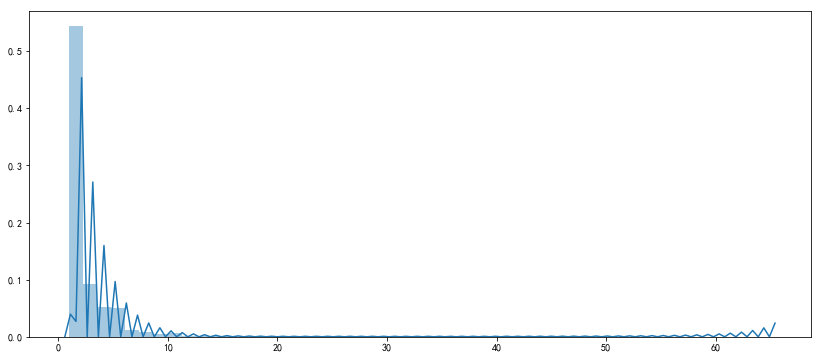

In [45]:
sns.distplot(df.groupby(['user_id']).size())

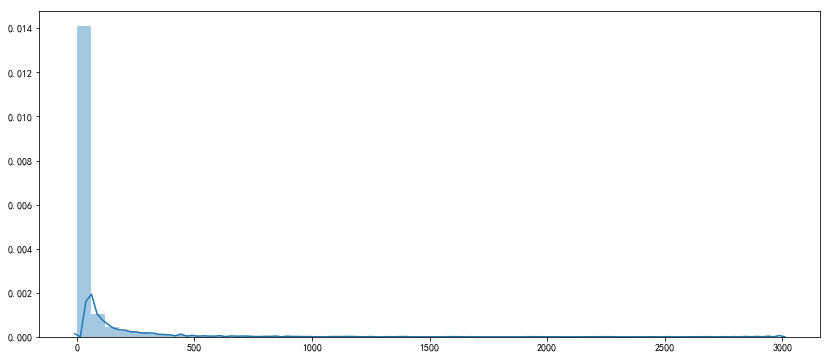

In [35]:
sns.distplot(df.groupby(['item_id']).size())

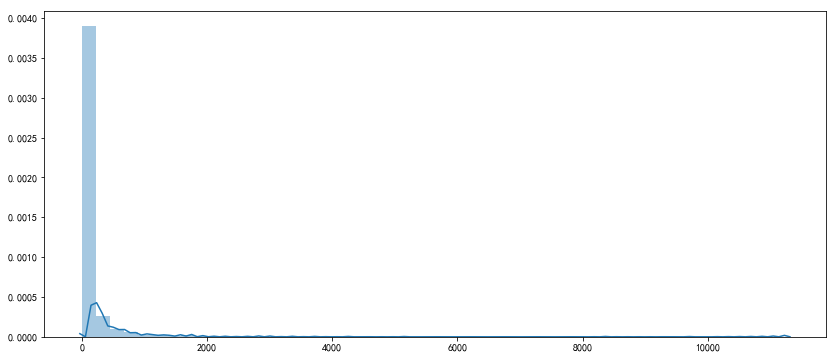

In [36]:
sns.distplot(df.groupby(['shop_id']).size())

In [39]:
df.groupby(['user_gender_id']).user_id.count()

user_gender_id
-1     12902
 0    360817
 1     94070
 2     10349
Name: user_id, dtype: int64